In [1]:
# importing the necessities
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("brca.csv")
df

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,565,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,M
565,566,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,M
566,567,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,M
567,568,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,M


In [3]:
df.shape

(569, 32)

In [4]:
df.describe()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,285.000000,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,164.400426,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,1.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,143.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,285.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,427.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,569.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


from describe i can conclude that i dont any missing values

from std i can say that i have variance in my dataset

In [5]:
df.isnull().sum()

Unnamed: 0             0
x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64

i have no null values in my dataset

In [6]:
# mapping my categorial variable to numerical variable
df['y'] = df.y.map({'B':0, 'M':1})
df['y']

0      0
1      0
2      0
3      0
4      0
      ..
564    1
565    1
566    1
567    1
568    1
Name: y, Length: 569, dtype: int64

In [7]:
df

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,565,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,1
565,566,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,1
566,567,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,1
567,568,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

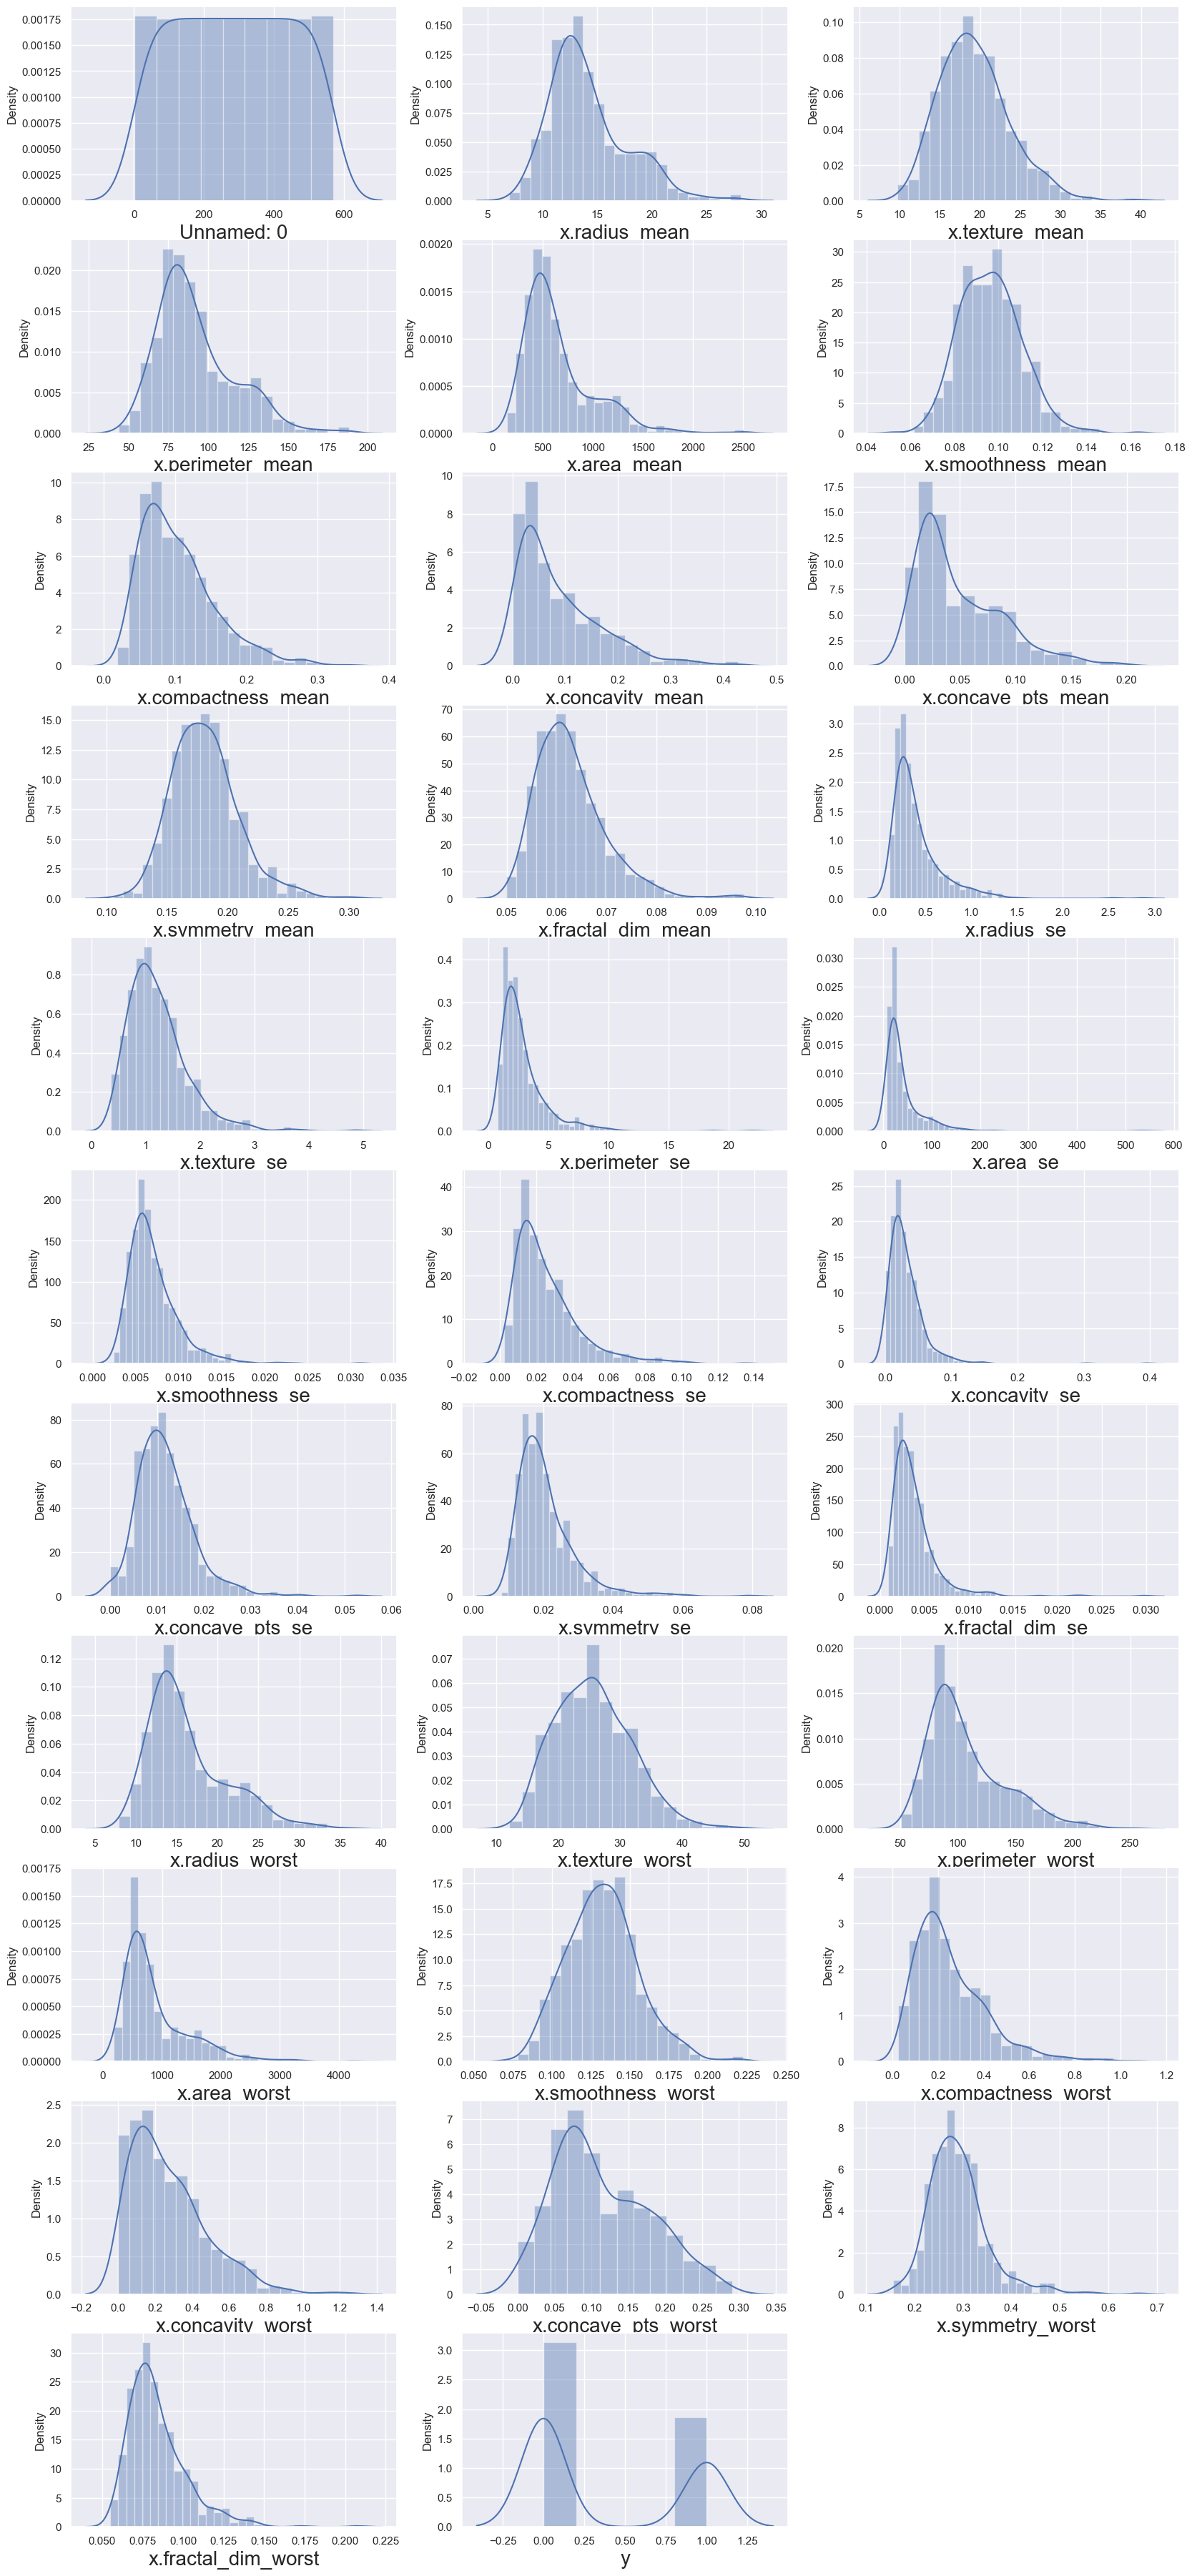

In [8]:
#visualizing my dataset
plt.figure(figsize=(20,50), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber <= 32:
        ax = plt.subplot(12,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.show()

there is skewness of the data in the columns below, i will need to replace some of their zero values with the mean

x.concavity_mean

x.concave_pts_mean

x.radius_se

x.concavity_worst

x.concave_pts_worst

In [9]:
df.iloc[35]

Unnamed: 0              36.00000
x.radius_mean            6.98100
x.texture_mean          13.43000
x.perimeter_mean        43.79000
x.area_mean            143.50000
x.smoothness_mean        0.11700
x.compactness_mean       0.07568
x.concavity_mean         0.00000
x.concave_pts_mean       0.00000
x.symmetry_mean          0.19300
x.fractal_dim_mean       0.07818
x.radius_se              0.22410
x.texture_se             1.50800
x.perimeter_se           1.55300
x.area_se                9.83300
x.smoothness_se          0.01019
x.compactness_se         0.01084
x.concavity_se           0.00000
x.concave_pts_se         0.00000
x.symmetry_se            0.02659
x.fractal_dim_se         0.00410
x.radius_worst           7.93000
x.texture_worst         19.54000
x.perimeter_worst       50.41000
x.area_worst           185.20000
x.smoothness_worst       0.15840
x.compactness_worst      0.12020
x.concavity_worst        0.00000
x.concave_pts_worst      0.00000
x.symmetry_worst         0.29320
x.fractal_

In [10]:
df['x.concavity_mean'] = df['x.concavity_mean'].replace(0, df['x.concavity_mean'].mean())
df['x.concave_pts_mean'] = df['x.concave_pts_mean'].replace(0, df['x.concave_pts_mean'].mean())
df['x.radius_se'] = df['x.radius_se'].replace(0, df['x.radius_se'].mean())
df['x.concavity_worst'] = df['x.concavity_worst'].replace(0, df['x.concavity_worst'].mean())
df['x.concave_pts_worst'] = df['x.concave_pts_worst'].replace(0, df['x.concave_pts_worst'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

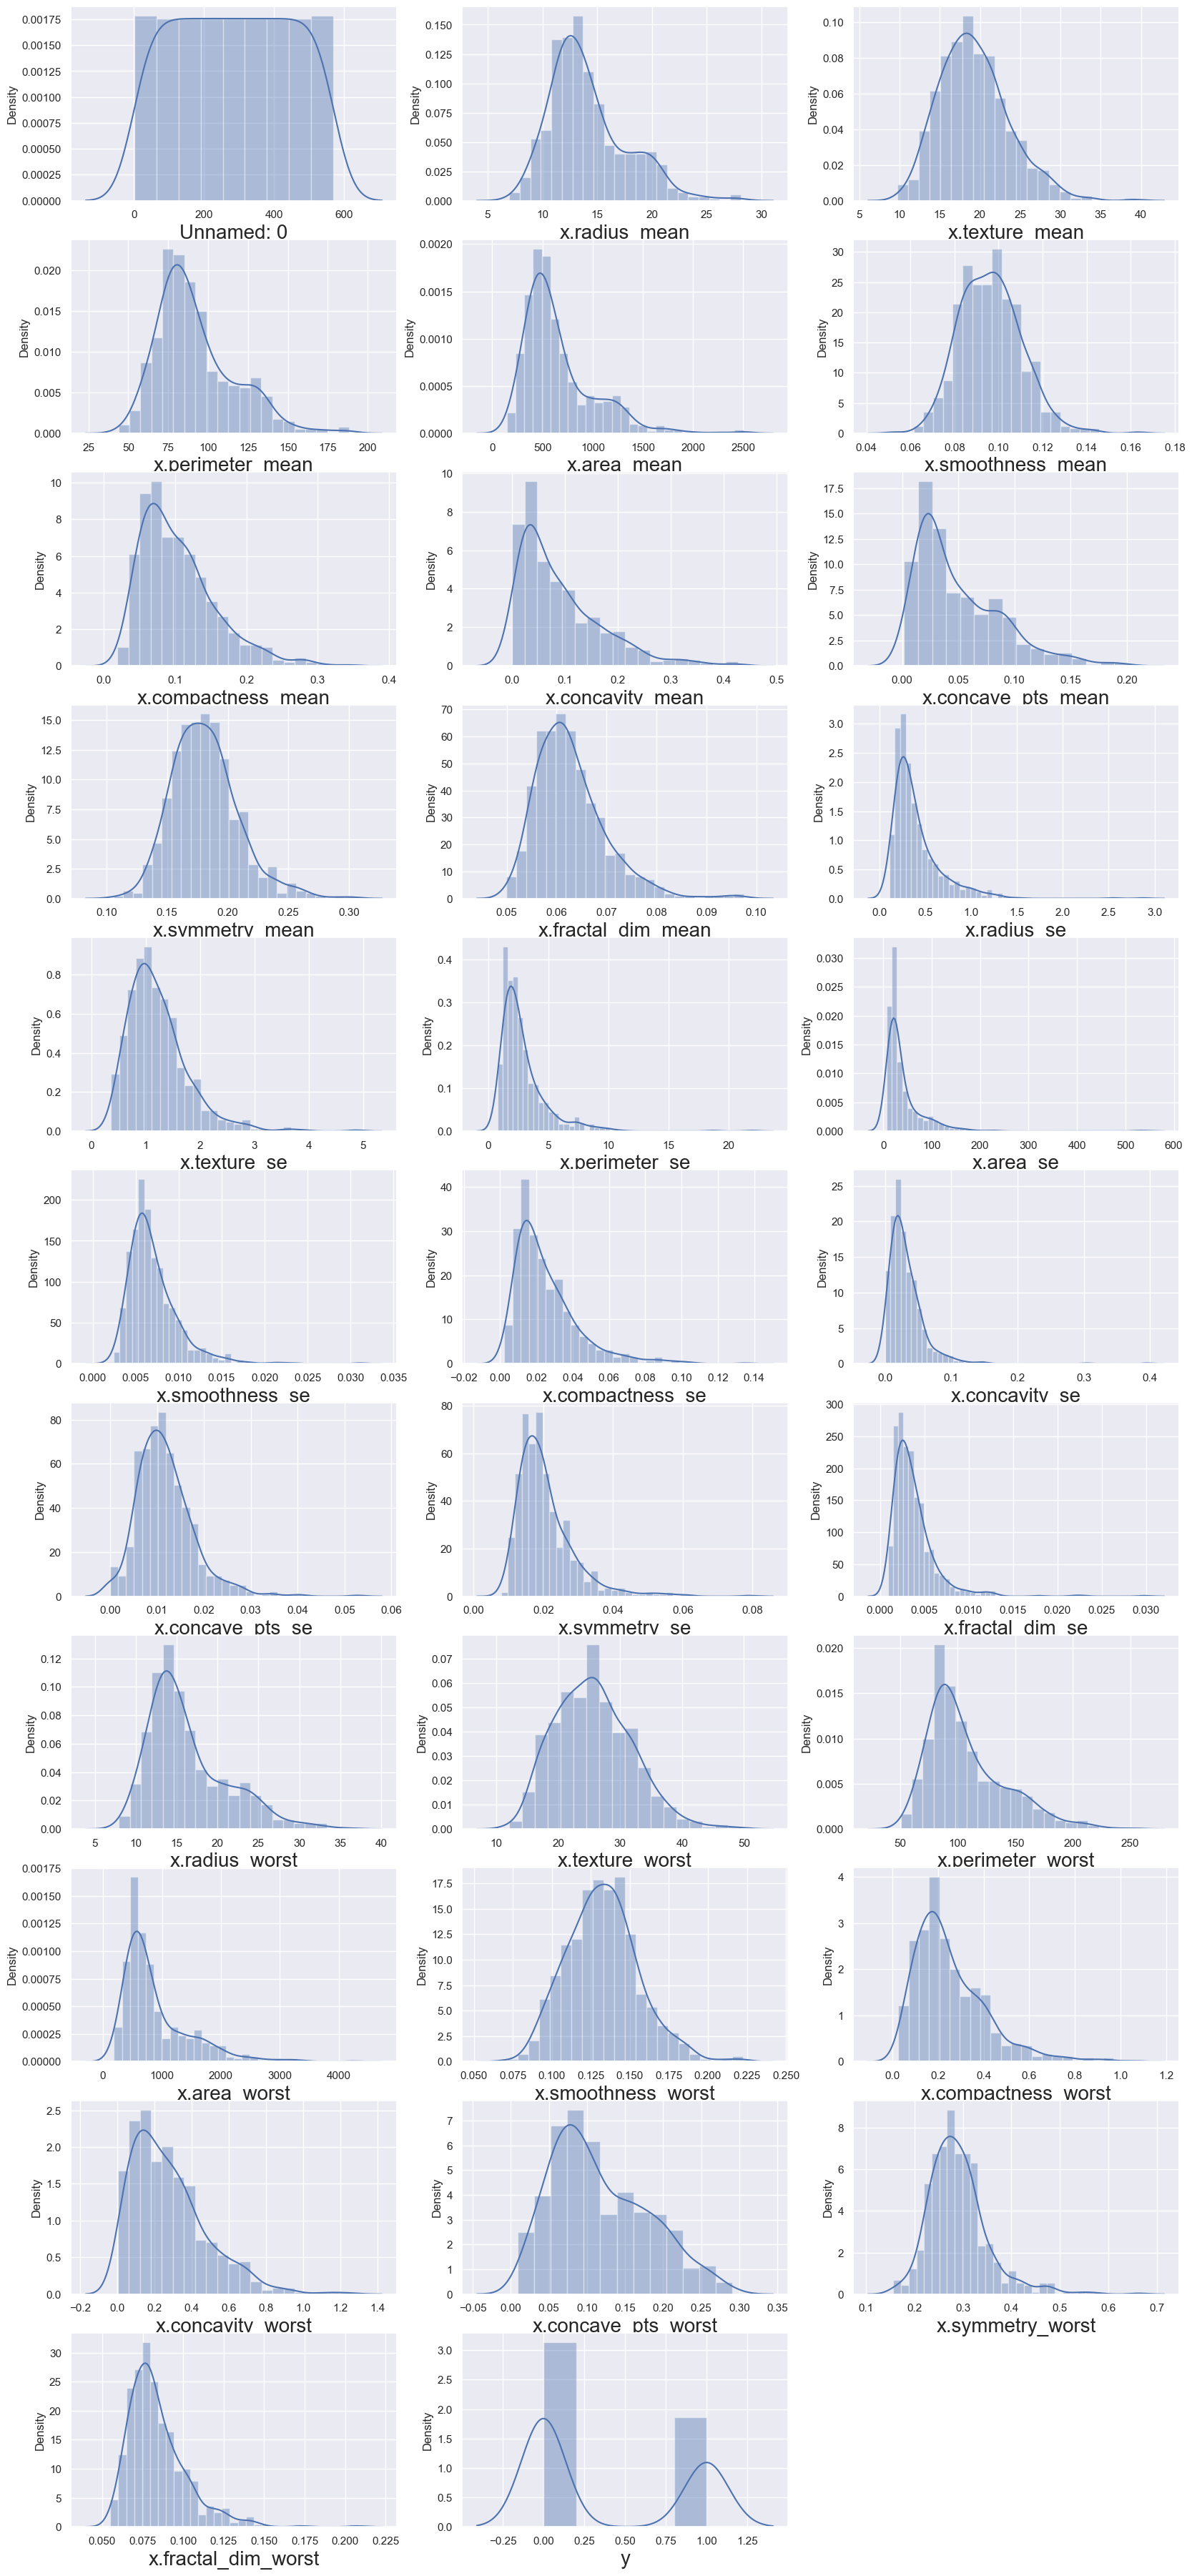

In [11]:
#visualizing my dataset
plt.figure(figsize=(20,50), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber <= 32:
        ax = plt.subplot(12,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.show()

In [12]:
df.columns

Index(['Unnamed: 0', 'x.radius_mean', 'x.texture_mean', 'x.perimeter_mean',
       'x.area_mean', 'x.smoothness_mean', 'x.compactness_mean',
       'x.concavity_mean', 'x.concave_pts_mean', 'x.symmetry_mean',
       'x.fractal_dim_mean', 'x.radius_se', 'x.texture_se', 'x.perimeter_se',
       'x.area_se', 'x.smoothness_se', 'x.compactness_se', 'x.concavity_se',
       'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se',
       'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst',
       'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst',
       'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst',
       'x.fractal_dim_worst', 'y'],
      dtype='object')

In [13]:
features1 = ['x.radius_mean', 'x.texture_mean', 'x.perimeter_mean',
       'x.area_mean', 'x.smoothness_mean', 'x.compactness_mean',
       'x.concavity_mean', 'x.concave_pts_mean', 'x.symmetry_mean',
       'x.fractal_dim_mean']
df[features1]

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503
...,...,...,...,...,...,...,...,...,...,...
564,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,0.06879
565,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,0.05623
566,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,0.05533
567,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,0.05648


<AxesSubplot:>

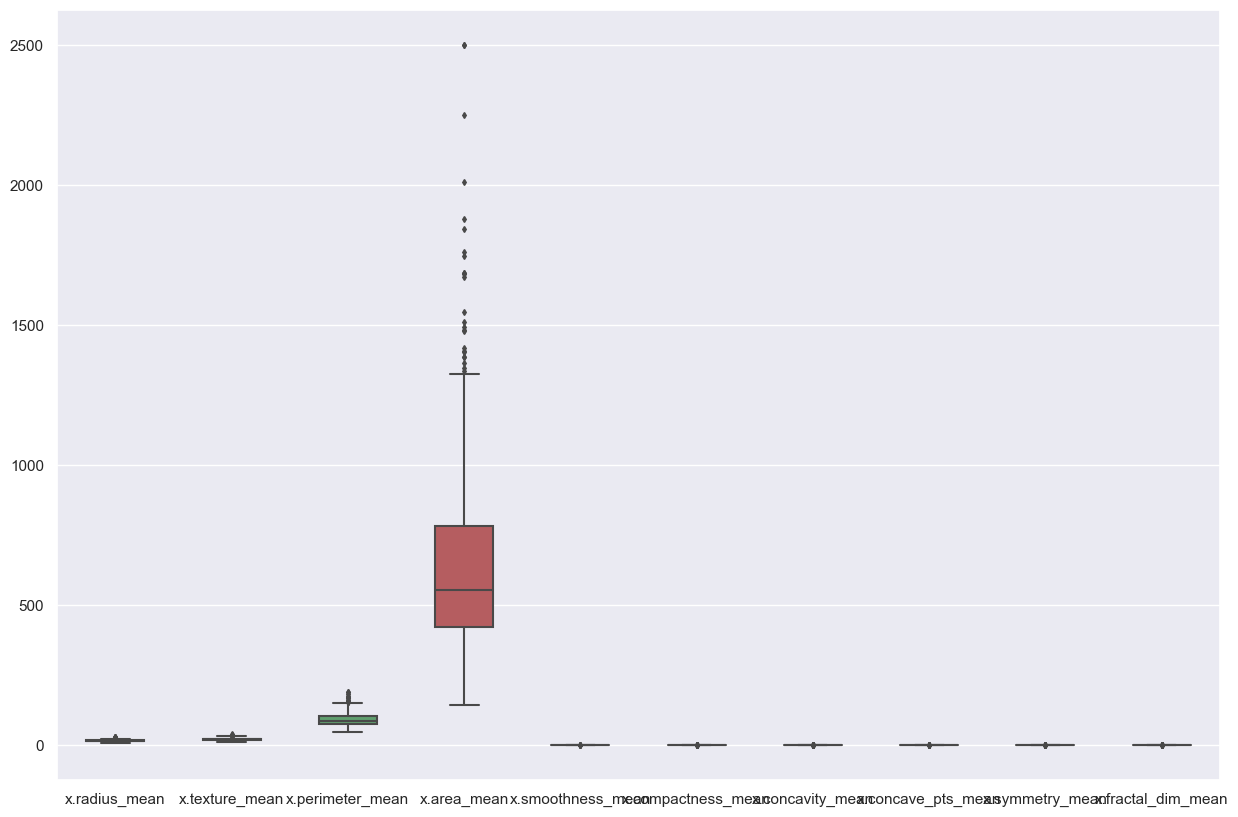

In [14]:
# drawing a box plot to see if there are any outliers
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data = df[features1], width=0.5, ax=ax, fliersize=3)

In [15]:
features2 = ['x.radius_se', 'x.texture_se', 'x.perimeter_se',
       'x.area_se', 'x.smoothness_se', 'x.compactness_se', 'x.concavity_se',
       'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se',
       'x.radius_worst', 'x.texture_worst']
df[features2]

,x.radius_se,x.texture_se,x.perimeter_se,x.area_se,x.smoothness_se,x.compactness_se,x.concavity_se,x.concave_pts_se,x.symmetry_se,x.fractal_dim_se,x.radius_worst,x.texture_worst
0,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26
1,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49
2,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66
3,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81
4,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96
...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.9622,1.0260,8.758,118.800,0.006399,0.043100,0.07845,0.026240,0.02057,0.006213,24.290,29.41
565,1.1760,1.2560,7.673,158.700,0.010300,0.028910,0.05198,0.024540,0.01114,0.004239,25.450,26.40
566,0.7655,2.4630,5.203,99.040,0.005769,0.024230,0.03950,0.016780,0.01898,0.002498,23.690,38.25
567,0.4564,1.0750,3.425,48.550,0.005903,0.037310,0.04730,0.015570,0.01318,0.003892,18.980,34.12


<AxesSubplot:>

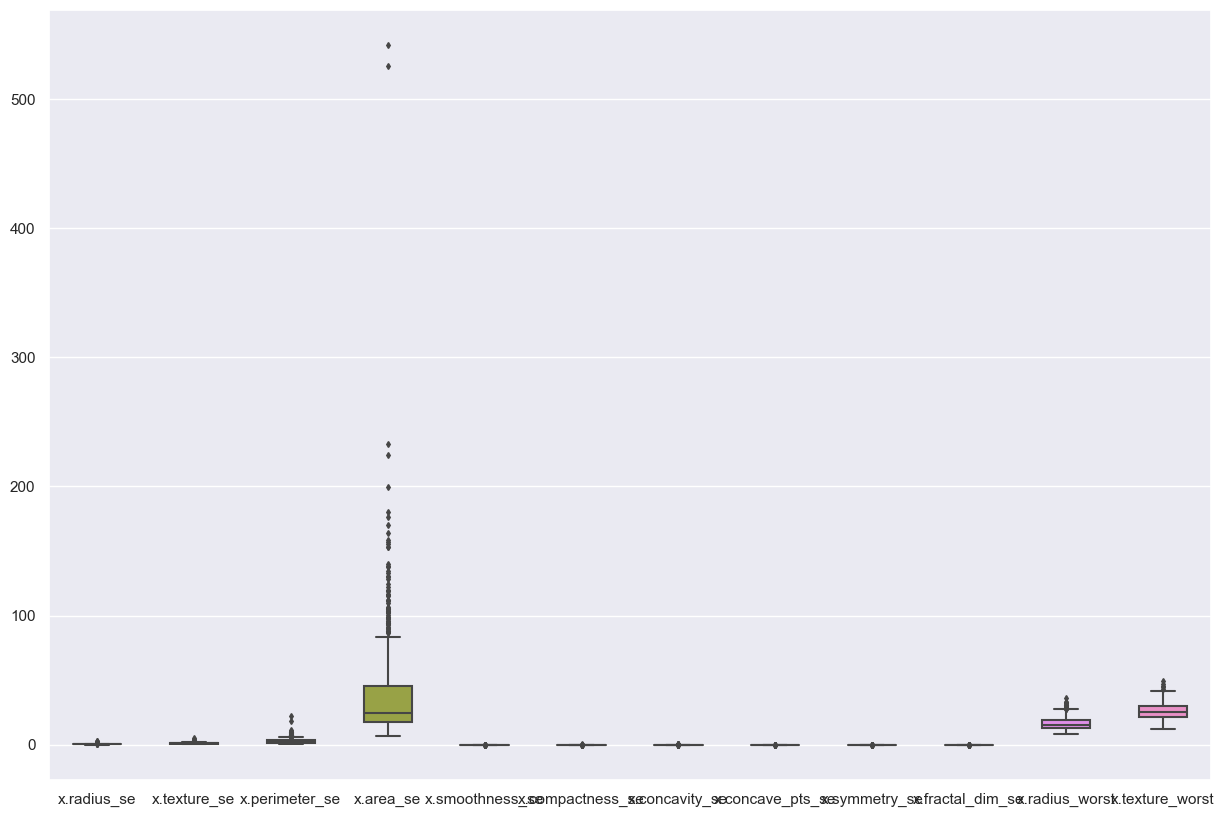

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data = df[features2], width=0.5, ax=ax, fliersize=3)

In [17]:
features3 = ['x.perimeter_worst',
       'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst',
       'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst',
       'x.fractal_dim_worst']
df[features3]

,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
0,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...
564,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873
565,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
566,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
567,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


<AxesSubplot:>

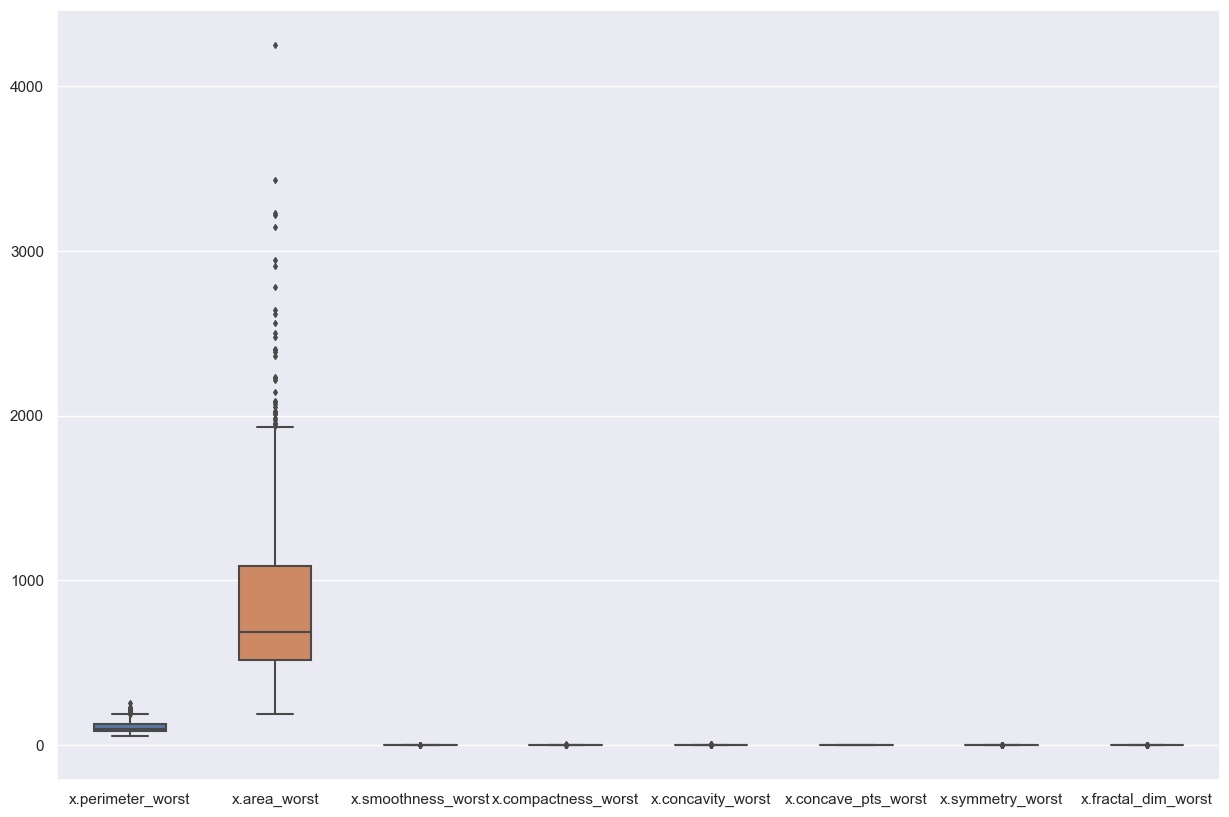

In [18]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data = df[features3], width=0.5, ax=ax, fliersize=3)

In [19]:
#removing outliers from the dataset
q = df['x.area_mean'].quantile(0.98)
df_cleaned = df[df['x.area_mean']<q]

In [20]:
df_cleaned.describe()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.00000,557.000000,557.000000,557.000000,...,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,280.660682,13.894935,19.219479,90.347899,627.328366,0.096112,0.10248,0.086722,0.047768,0.180908,...,25.618528,105.139013,839.408977,0.132156,0.251048,0.272729,0.114494,0.290048,0.083965,0.359066
std,163.299427,3.171192,4.296008,21.788953,297.476491,0.013955,0.05123,0.073106,0.034821,0.027345,...,6.158153,30.501363,493.344428,0.022908,0.156528,0.201935,0.060995,0.062037,0.018165,0.480158
min,1.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.01938,0.000692,0.001852,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.001845,0.008772,0.156500,0.055040,0.000000
25%,140.000000,11.670000,16.150000,74.870000,417.200000,0.086000,0.06374,0.031020,0.020900,0.161900,...,21.030000,83.900000,513.100000,0.116200,0.144200,0.122000,0.065750,0.250200,0.071270,0.000000
50%,279.000000,13.270000,18.770000,85.840000,541.800000,0.095780,0.09097,0.065050,0.034850,0.178800,...,25.340000,97.170000,677.300000,0.131200,0.210100,0.231800,0.101700,0.281800,0.079930,0.000000
75%,419.000000,15.530000,21.680000,102.700000,748.900000,0.104900,0.12960,0.120400,0.068610,0.195400,...,29.460000,123.400000,1021.000000,0.145300,0.325300,0.377900,0.157100,0.317600,0.092090,1.000000
max,569.000000,22.270000,39.280000,152.800000,1546.000000,0.163400,0.34540,0.426400,0.182300,0.304000,...,49.540000,214.000000,3432.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [21]:
q = df_cleaned['x.area_se'].quantile(0.95)
df_cleaned = df_cleaned[df_cleaned['x.area_se']<q]


In [22]:
df_cleaned.describe()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,...,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,270.573864,13.600339,19.036420,88.231705,597.164394,0.095722,0.098198,0.080091,0.044273,0.179710,...,25.420341,101.696383,781.543561,0.131846,0.242799,0.260935,0.109612,0.288826,0.083606,0.323864
std,161.139544,2.954830,4.205956,20.118455,270.189232,0.013958,0.046469,0.066296,0.031440,0.025962,...,6.076353,26.899548,419.961769,0.023116,0.152181,0.195964,0.057796,0.060577,0.018158,0.468392
min,1.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000692,0.001852,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.001845,0.008772,0.156600,0.055210,0.000000
25%,132.750000,11.600000,16.010000,74.307500,409.075000,0.085218,0.062515,0.029837,0.020497,0.161675,...,20.875000,83.210000,506.050000,0.115300,0.139775,0.117775,0.065253,0.248775,0.071090,0.000000
50%,264.500000,13.065000,18.605000,84.485000,526.800000,0.095150,0.086765,0.059285,0.032695,0.178150,...,25.090000,95.385000,647.050000,0.131000,0.204400,0.221800,0.098095,0.280650,0.079460,0.000000
75%,403.250000,15.042500,21.487500,98.042500,691.075000,0.104400,0.125675,0.111675,0.063908,0.194825,...,29.252500,115.750000,923.375000,0.144925,0.309575,0.354900,0.149525,0.317025,0.091360,1.000000
max,569.000000,21.610000,39.280000,144.400000,1407.000000,0.163400,0.283900,0.410800,0.156200,0.274300,...,49.540000,188.000000,2615.000000,0.222600,1.058000,1.252000,0.290300,0.663800,0.207500,1.000000


In [23]:
q = df_cleaned['x.area_worst'].quantile(0.97)
df_cleaned = df_cleaned[df_cleaned['x.area_worst']<q]

In [24]:
df_cleaned.describe()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,...,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,264.625000,13.400994,18.959629,86.881133,576.947656,0.095529,0.096800,0.077263,0.042476,0.179452,...,25.273203,99.604277,742.296875,0.131344,0.238407,0.254099,0.106337,0.287549,0.083370,0.302734
std,159.702292,2.765197,4.211652,18.841913,247.490527,0.014018,0.045632,0.064430,0.029787,0.025801,...,6.051413,24.489435,360.311657,0.023117,0.150212,0.192922,0.055253,0.059449,0.018121,0.459891
min,1.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000692,0.001852,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.001845,0.008772,0.156600,0.055210,0.000000
25%,128.750000,11.535000,15.890000,73.975000,407.150000,0.085110,0.062185,0.029540,0.020300,0.161675,...,20.777500,82.910000,495.950000,0.114400,0.137825,0.114475,0.064730,0.248150,0.070860,0.000000
50%,256.500000,12.995000,18.585000,84.065000,518.000000,0.094935,0.085565,0.057490,0.031545,0.178050,...,25.010000,94.330000,633.600000,0.130100,0.200750,0.209450,0.096010,0.280500,0.079185,0.000000
75%,393.250000,14.862500,21.460000,96.760000,678.750000,0.104225,0.123125,0.108500,0.059812,0.194525,...,29.120000,113.700000,877.575000,0.143700,0.303400,0.343825,0.145225,0.315350,0.090857,1.000000
max,569.000000,21.370000,39.280000,141.300000,1386.000000,0.163400,0.283900,0.410800,0.152000,0.274300,...,49.540000,184.600000,1821.000000,0.222600,1.058000,1.252000,0.270100,0.663800,0.207500,1.000000


In [25]:
# splitting the feature columns from the target
X = df_cleaned.drop(columns = ['Unnamed: 0', 'y'], axis=1)
y = df_cleaned['y']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


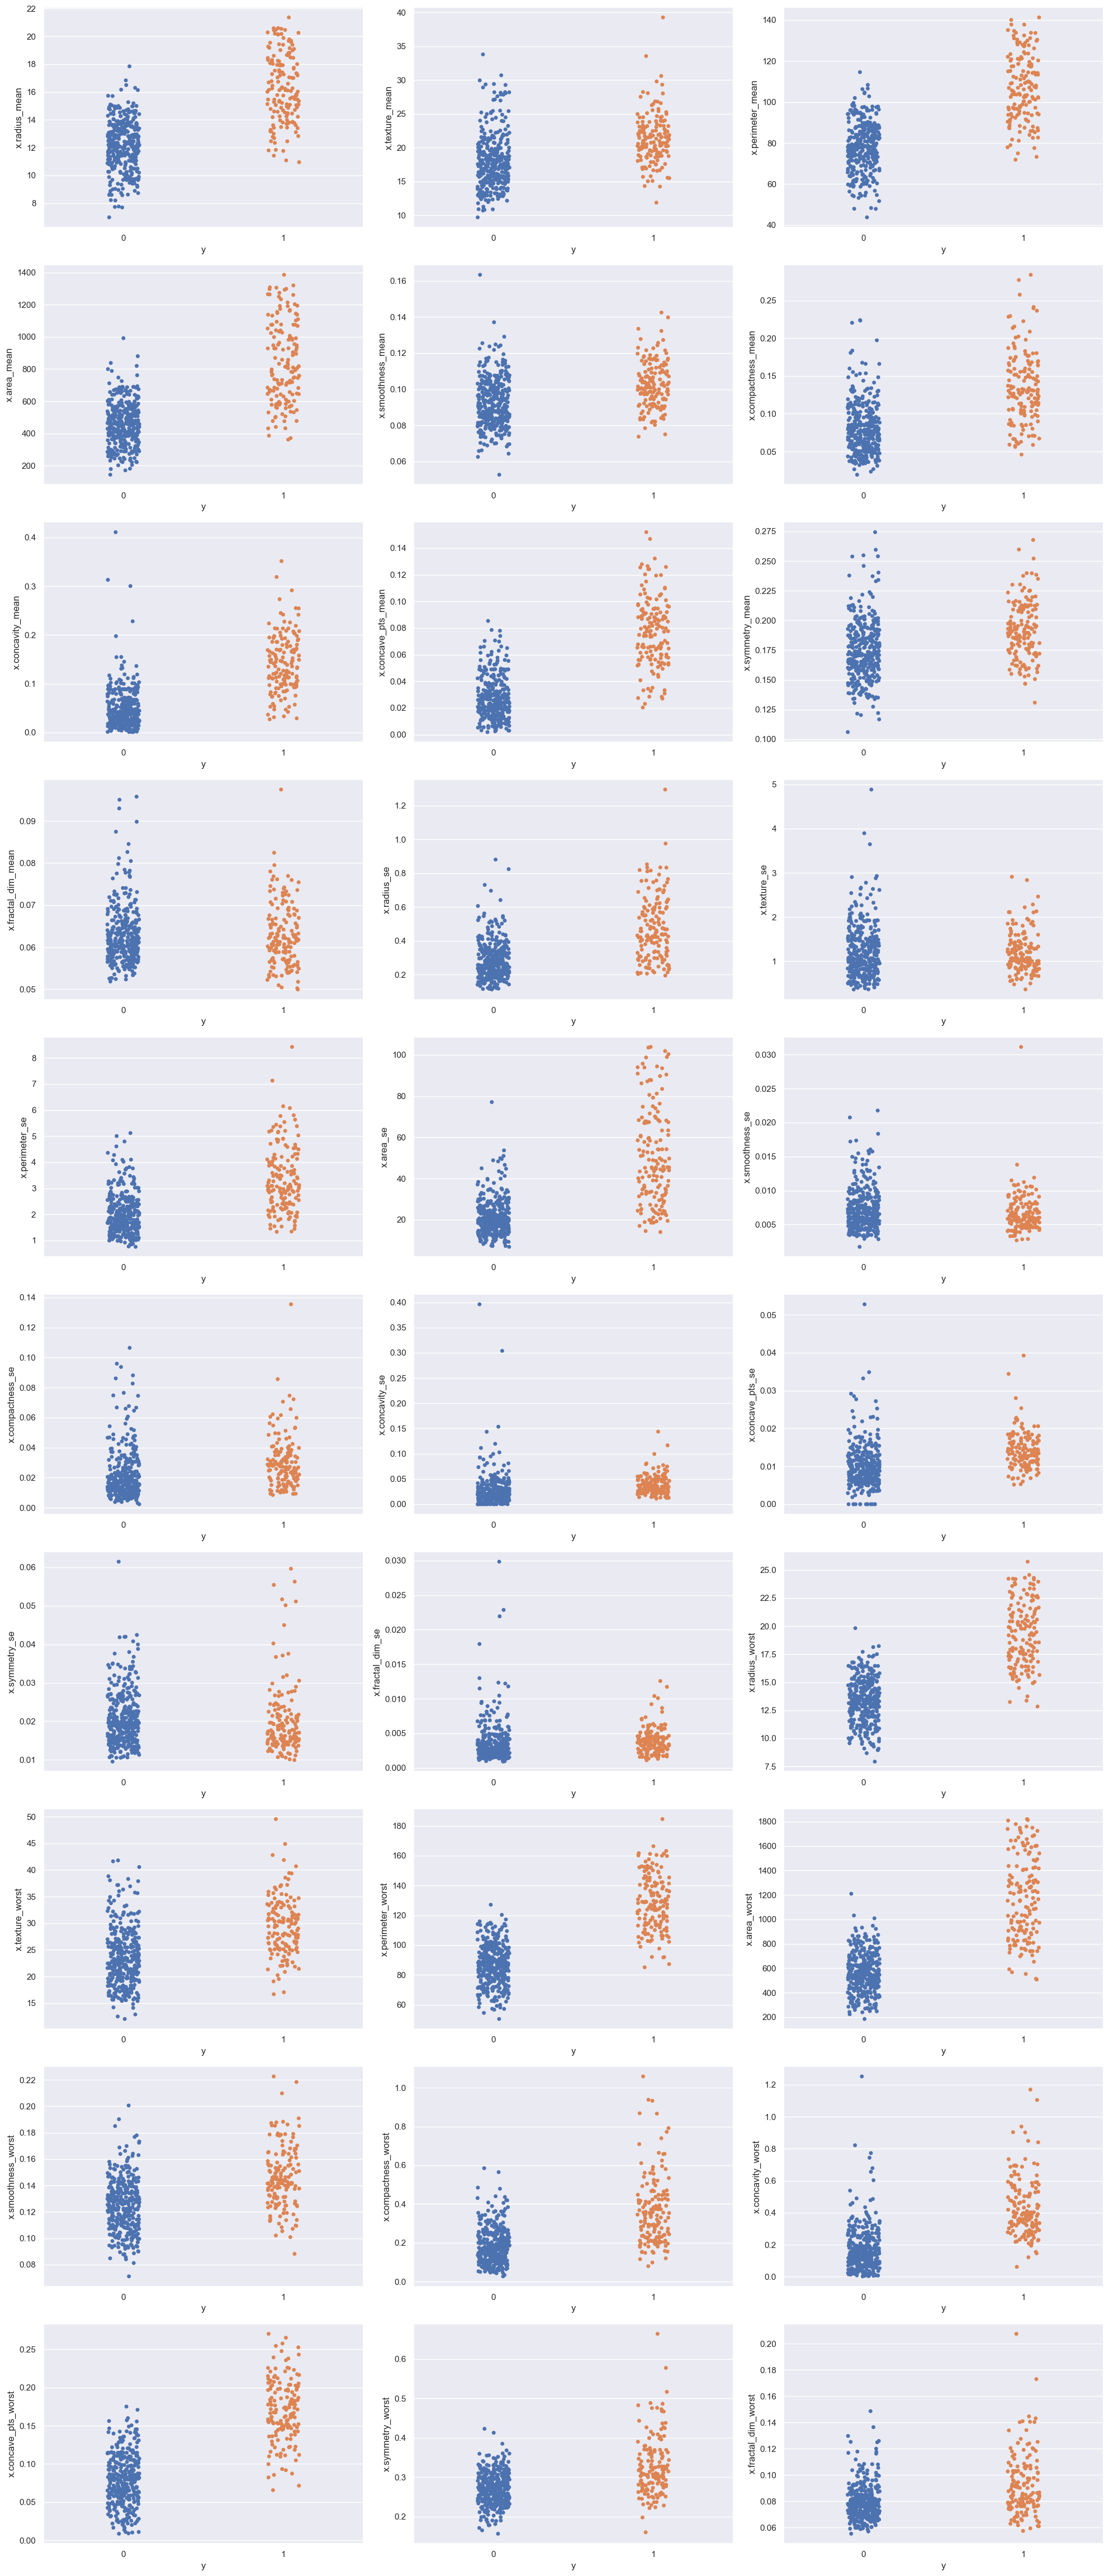

In [26]:
# visualizing the relationship between the independent variable and the dependent variable
plt.figure(figsize=(20, 55))
plotnumber = 1

for column in X:
    if plotnumber <=32:
        ax = plt.subplot(12, 3, plotnumber)
        sns.stripplot(y, X[column])
    plotnumber += 1
plt.tight_layout()

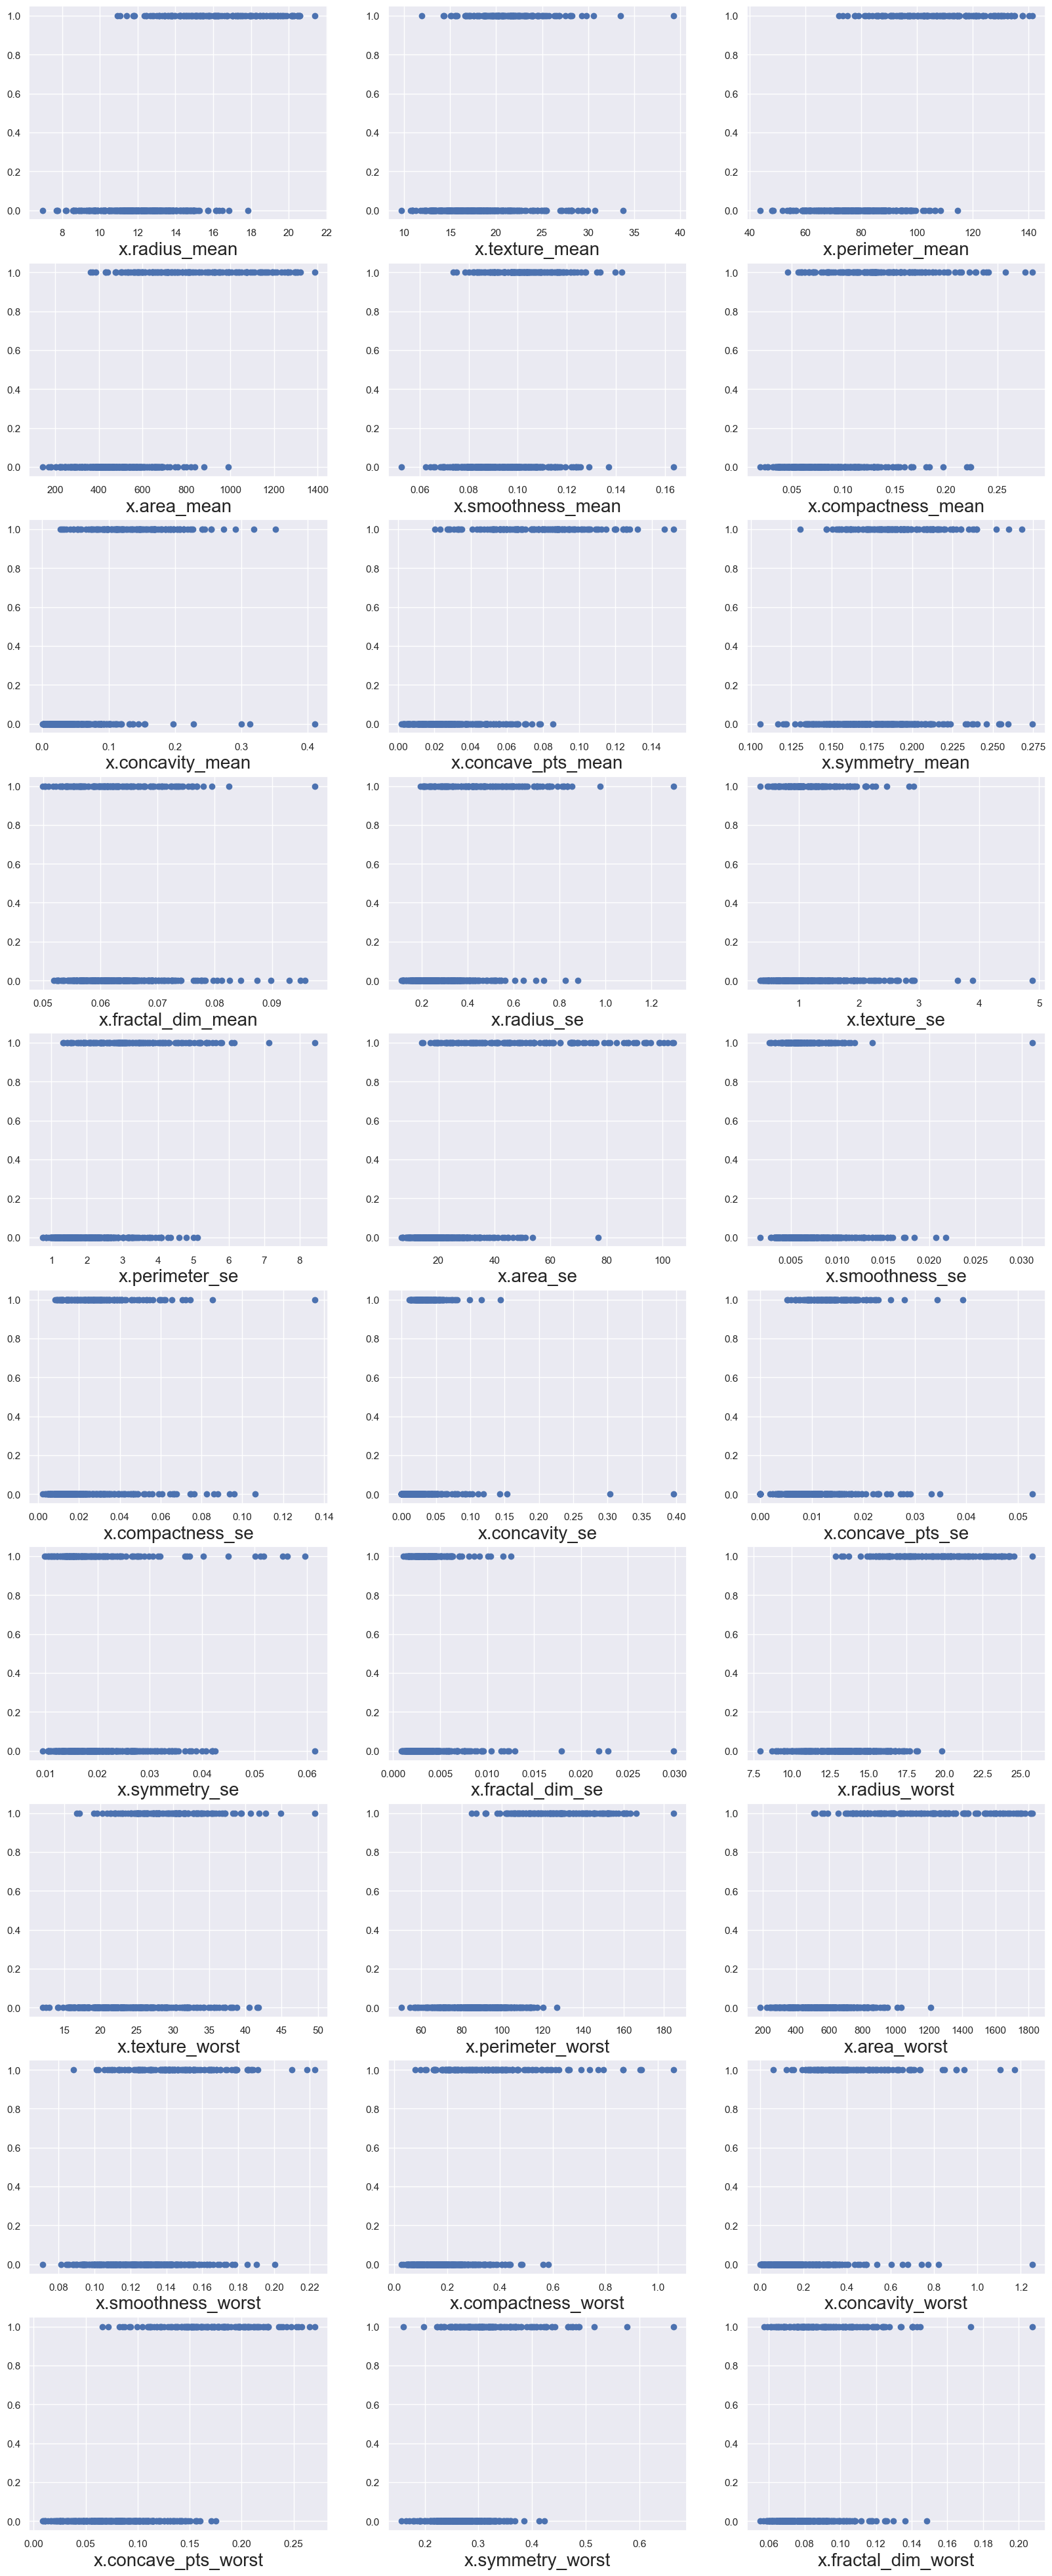

In [27]:
#visualizing my dataset with a scatter plot
plt.figure(figsize=(20,50), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber <= 32:
        ax = plt.subplot(10,3, plotnumber)
        plt.scatter(X[column], y)
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.show()

it seems like logistic regression can be used to solve this classification problem

In [28]:
# scalling the data to minimize on the variance of the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.05031896, -1.09318789,  0.03075236, ...,  0.4069497 ,
         0.17092486, -0.59547167],
       [-0.11619719, -0.77233513, -0.06646652, ..., -0.60700902,
         0.5194636 , -0.08505444],
       [-1.41067922, -1.54951182, -1.40999959, ..., -0.79831515,
        -0.71641772, -0.31153828],
       ...,
       [ 2.43584373,  2.20803056,  2.354443  , ...,  1.02289746,
        -0.51099875, -0.93906423],
       [ 1.15801331,  2.16762688,  1.13787886, ...,  0.64245914,
        -1.10705051, -0.28557549],
       [ 2.60597979,  2.46471277,  2.82725614, ...,  2.87436398,
         2.0399007 ,  2.24441472]])

In [29]:
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
0,0.050319,-1.093188,0.030752,-0.043065,0.161419,-0.340219,-0.165042,0.179239,0.351041,-0.747110,...,-0.019772,-0.994658,0.003913,-0.086390,0.548003,-0.407204,-0.078343,0.406950,0.170925,-0.595472
1,-0.116197,-0.772335,-0.066467,-0.230325,0.854774,0.662470,-0.490674,-0.382301,0.669166,0.754959,...,-0.191214,-0.791200,-0.143642,-0.310582,-0.006255,0.261169,-0.337769,-0.607009,0.519464,-0.085054
2,-1.410679,-1.549512,-1.410000,-1.225679,0.490602,-0.699309,-0.741112,-0.729777,0.079471,0.890074,...,-1.391309,-1.590142,-1.409097,-1.187347,0.045707,-0.823689,-0.858333,-0.798315,-0.716418,-0.311538
3,-0.134297,-0.128253,-0.226904,-0.214956,-0.406975,-1.297281,-0.802323,-0.445142,-1.270622,-0.607683,...,-0.528477,-0.407444,-0.619005,-0.545608,-1.486730,-1.280888,-1.067638,-1.018245,-1.496000,-1.197587
4,-1.884164,-0.503769,-1.868469,-1.516884,-0.680462,-0.819737,-0.953643,-1.228577,-0.098990,0.312244,...,-1.747122,-0.548044,-1.730775,-1.389314,-0.071207,-0.684416,-0.961429,-1.461908,0.386446,-0.512612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0.314573,0.853319,0.365972,0.213762,0.590570,0.408014,1.072544,0.635596,0.510104,-0.436634,...,0.030818,1.488181,0.191932,-0.038885,0.288194,0.232515,0.878420,0.541009,-0.298845,0.007749
508,0.658465,2.771305,0.877566,0.566039,0.661977,2.454630,2.761292,1.741202,1.293778,1.245108,...,0.657565,2.897493,1.189255,0.479785,0.448410,3.687002,4.752170,2.341750,2.043268,3.177970
509,2.435844,2.208031,2.354443,2.766657,0.162133,0.144783,1.036812,1.862852,-0.164943,-1.082021,...,2.391661,2.146521,2.264238,2.746706,-0.638455,-0.307915,0.349710,1.022897,-0.510999,-0.939064
510,1.158013,2.167627,1.137879,1.137124,-0.784001,0.120654,0.236870,0.354322,-0.793434,-0.916722,...,1.067902,1.463369,1.107507,1.060405,-0.755369,0.473077,0.447254,0.642459,-1.107051,-0.285575


In [30]:
df_scaled = pd.concat([df_scaled, y], axis=1)
df_scaled

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,0.050319,-1.093188,0.030752,-0.043065,0.161419,-0.340219,-0.165042,0.179239,0.351041,-0.747110,...,-0.994658,0.003913,-0.086390,0.548003,-0.407204,-0.078343,0.406950,0.170925,-0.595472,0.0
1,-0.116197,-0.772335,-0.066467,-0.230325,0.854774,0.662470,-0.490674,-0.382301,0.669166,0.754959,...,-0.791200,-0.143642,-0.310582,-0.006255,0.261169,-0.337769,-0.607009,0.519464,-0.085054,0.0
2,-1.410679,-1.549512,-1.410000,-1.225679,0.490602,-0.699309,-0.741112,-0.729777,0.079471,0.890074,...,-1.590142,-1.409097,-1.187347,0.045707,-0.823689,-0.858333,-0.798315,-0.716418,-0.311538,0.0
3,-0.134297,-0.128253,-0.226904,-0.214956,-0.406975,-1.297281,-0.802323,-0.445142,-1.270622,-0.607683,...,-0.407444,-0.619005,-0.545608,-1.486730,-1.280888,-1.067638,-1.018245,-1.496000,-1.197587,0.0
4,-1.884164,-0.503769,-1.868469,-1.516884,-0.680462,-0.819737,-0.953643,-1.228577,-0.098990,0.312244,...,-0.548044,-1.730775,-1.389314,-0.071207,-0.684416,-0.961429,-1.461908,0.386446,-0.512612,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [31]:
df_scaled.describe()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,...,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,512.000000
mean,-6.184289e-16,-9.454243e-17,1.118897e-16,6.080206e-16,5.225854e-16,6.418477e-17,-1.908196e-17,2.081668e-17,2.055647e-16,-4.371503e-16,...,-4.779163e-16,1.040834e-17,-5.377643e-17,6.969252e-16,-9.540979e-17,7.025630e-17,3.382711e-17,3.209238e-16,8.066464e-17,0.302734
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,...,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,0.459891
min,-2.323984e+00,-2.198347e+00,-2.289220e+00,-1.753084e+00,-3.063290e+00,-1.698268e+00,-1.189601e+00,-1.365181e+00,-2.849609e+00,-1.853898e+00,...,-2.192242e+00,-2.010761e+00,-1.547665e+00,-2.605638e+00,-1.406833e+00,-1.308826e+00,-1.767491e+00,-2.204863e+00,-1.555542e+00,0.000000
25%,-6.754742e-01,-7.295548e-01,-6.856392e-01,-6.867484e-01,-7.440131e-01,-7.593036e-01,-7.414229e-01,-7.452354e-01,-6.896552e-01,-6.619447e-01,...,-7.436445e-01,-6.823597e-01,-6.843736e-01,-7.337184e-01,-6.702559e-01,-7.244433e-01,-7.537495e-01,-6.633792e-01,-6.910368e-01,0.000000
50%,-1.469665e-01,-8.903757e-02,-1.496073e-01,-2.384144e-01,-4.244630e-02,-2.464430e-01,-3.071956e-01,-3.673467e-01,-5.437468e-02,-1.886851e-01,...,-4.353703e-02,-2.155801e-01,-3.019696e-01,-5.388655e-02,-2.509396e-01,-2.316636e-01,-1.870776e-01,-1.186822e-01,-2.311641e-01,0.000000
75%,5.290529e-01,5.942600e-01,5.248155e-01,4.117406e-01,6.209182e-01,5.774681e-01,4.852886e-01,5.825840e-01,5.847854e-01,4.556236e-01,...,6.363074e-01,5.761467e-01,3.758147e-01,5.350124e-01,4.330942e-01,4.655439e-01,7.045068e-01,4.681089e-01,4.136243e-01,1.000000
max,2.884713e+00,4.829516e+00,2.891006e+00,3.272221e+00,4.846386e+00,4.104207e+00,5.181779e+00,3.680549e+00,3.679717e+00,4.970815e+00,...,4.014026e+00,3.474104e+00,2.996734e+00,3.951492e+00,5.461559e+00,5.177628e+00,2.966756e+00,6.335178e+00,6.856951e+00,1.000000


In [32]:
# checking for multicollinearity between the columns
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns
vif

,vif,Features
0,3533.826709,x.radius_mean
1,11.799430,x.texture_mean
2,3043.683120,x.perimeter_mean
3,460.590052,x.area_mean
4,8.842328,x.smoothness_mean
5,42.259940,x.compactness_mean
6,54.562483,x.concavity_mean
7,42.235606,x.concave_pts_mean
8,3.967530,x.symmetry_mean
9,15.997691,x.fractal_dim_mean


my vif seems to be very huge. in this case i use pca to reduce dimensionality and also to reduce multicollinearity

In [33]:
# splitting my data into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=355)

In [34]:
# feeding the data into my model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [35]:
# testing my model
print(log_reg.score(x_train, y_train))
print(log_reg.score(x_test, y_test))

0.9916201117318436
0.974025974025974


In [36]:
x1_data_pred = X_scaled[511][0:]

In [37]:
# doing prediction using my model
log_reg.predict([x1_data_pred])

array([1], dtype=int64)

In [38]:
# evaluating the accuracy using metrics
y_pred = log_reg.predict(x_test)
accuracy_score(y_pred, y_test)

0.974025974025974

In [39]:
cof_mat = confusion_matrix(y_test, y_pred)
cof_mat

array([[99,  1],
       [ 3, 51]], dtype=int64)

In [40]:
accuracy_score = (cof_mat[0][0] + cof_mat[1][1]) / (cof_mat[0][0] + cof_mat[0][1] + (cof_mat[1][0] + cof_mat[1][1]))
accuracy_score

0.974025974025974

In [41]:
precision = (cof_mat[0][0]) / (cof_mat[0][0] + cof_mat[0][1])
precision

0.99

In [42]:
recall = (cof_mat[0][0]) / ((cof_mat[0][0]) + cof_mat[1][0])
recall

0.9705882352941176

In [43]:
f1_score = 2*((recall * precision) / (recall + precision))
f1_score

0.9801980198019802

In [44]:
# area under the curve
auc = roc_auc_score(y_test, y_pred)
auc

0.9672222222222222

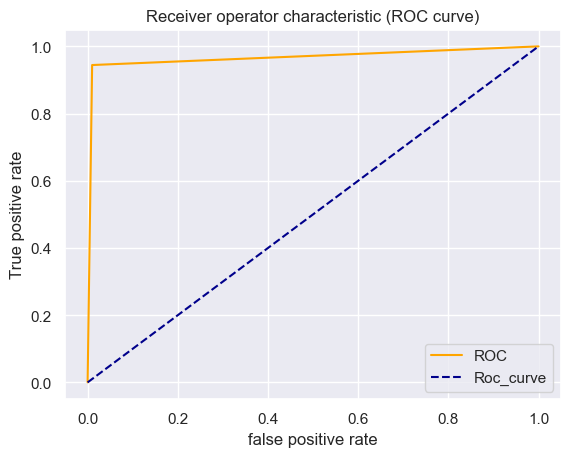

In [46]:
# drawing roc curve
fpr, tpr, threshold = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')

plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='Roc_curve')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operator characteristic (ROC curve)')
plt.legend()
plt.show()